# AR Model

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [166]:
data = pd.read_csv('daily-minimum-temperatures-in-me.csv', parse_dates=[0])
print(data.shape)
data.head()

(3650, 2)


,Date,Daily minimum temperatures
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [167]:
def replace_val(val):
    if str(val).startswith('?'):
        val = float(val.split('?')[1])
    return float(val)
    
data['Daily minimum temperatures'] = data['Daily minimum temperatures'].apply(replace_val)

In [168]:
data.index = data['Date']
data.head()

,Date,Daily minimum temperatures
Date,,
1981-01-01,1981-01-01,20.7
1981-01-02,1981-01-02,17.9
1981-01-03,1981-01-03,18.8
1981-01-04,1981-01-04,14.6
1981-01-05,1981-01-05,15.8


In [169]:
from statsmodels.tsa.ar_model import AutoReg

X = data['Daily minimum temperatures'].values
train, test = X[1:len(X)-7], X[len(X)-7:]

model = AutoReg(train, lags=29)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

Coefficients:  [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]


predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


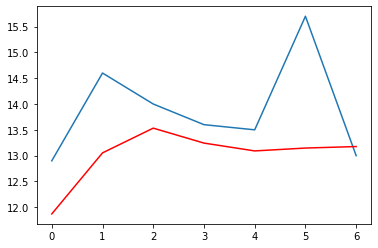

In [66]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# walk forward AR Model

In [70]:
data = data.rename({'Daily minimum temperatures' : 'Temp'}, axis=1)
data.head()

,Date,Temp
Date,,
1981-01-01,1981-01-01,20.7
1981-01-02,1981-01-02,17.9
1981-01-03,1981-01-03,18.8
1981-01-04,1981-01-04,14.6
1981-01-05,1981-01-05,15.8


In [71]:
train, test = data.Temp[1:data.shape[0]-7], data.Temp[data.shape[0]-7:]

In [84]:
df = train
predict = []

for t in test:
    model = AutoReg(train, lags=29)
    model_fit = model.fit()
    y = model_fit.predict(start=len(train),end=len(train+len(test)-1))
    predict.append(y.values[0])
    df = np.append(df, t)
    df = pd.Series(df)

# ARMA Model

In [94]:
df = pd.read_csv('daily-minimum-temperatures-in-me.csv', parse_dates=[0])
df = df.rename({'Daily minimum temperatures' : 'Temp'}, axis=1)
df['Temp'] = df['Temp'].apply(replace_val)
df['t'] = df['Temp'].shift(1)
df['Residual'] = df['Temp']-df['t']
df.head()

,Date,Temp,t,Residual
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [95]:
train, test = df.Residual[1:df.shape[0]-7], df.Residual[df.shape[0]-7:]

In [96]:
model = AutoReg(train, lags=29)
model_fit = model.fit()

predict_res = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

predictions = df.t[df.shape[0]-7:]+ predict_res   # adding forecaste values with forecasted residuals
predictions.head()

3643    11.264192
3644    13.410869
3645    14.348313
3646    13.877946
3647    13.677509
dtype: float64

In [97]:
df[df.shape[0]-7:]

,Date,Temp,t,Residual
3643,1990-12-25,12.9,10.0,2.9
3644,1990-12-26,14.6,12.9,1.7
3645,1990-12-27,14.0,14.6,-0.6
3646,1990-12-28,13.6,14.0,-0.4
3647,1990-12-29,13.5,13.6,-0.1
3648,1990-12-30,15.7,13.5,2.2
3649,1990-12-31,13.0,15.7,-2.7


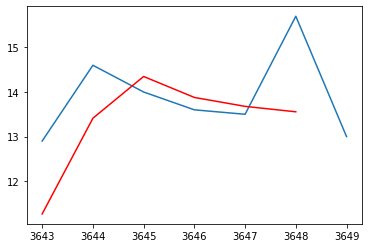

In [100]:
plt.plot(df['Temp'][df.shape[0]-7:])
plt.plot(predictions, color='red')
plt.show()

# ARIMA

In [102]:
df = pd.read_csv('sales_of_shampoo.csv')
print(df.shape)
df = df.rename({'Sales of shampoo over a three year period' : 'Sale'}, axis=1)
df.head()

(37, 2)


,Month,Sale
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


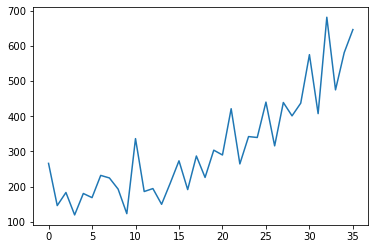

In [103]:
df.Sale.plot() # looks like a quadratic trend hence D should be 2

In [104]:
# to select value of Q, plot an autocorrelation plot

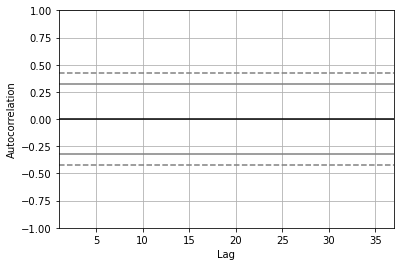

In [108]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sale'])

In [109]:
# when the line crosses the confidence interval for the first time. the lag value at that point is the value of Q

In [110]:
# to select value of P, plot a partial autocorrelation plot

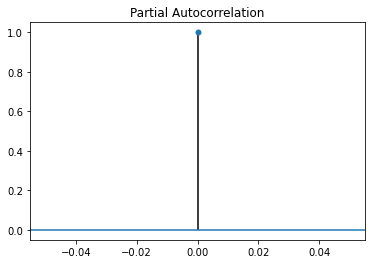

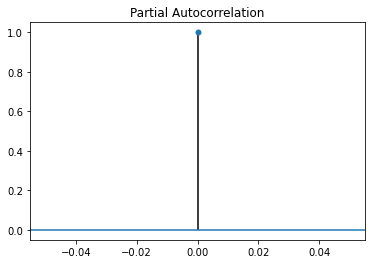

In [112]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(df['Sale'], lags=15)

In [127]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['Sale'][0:df.shape[0]-1], order=(2,2,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D2.Sale   No. Observations:                   34
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -193.326
Method:                       css-mle   S.D. of innovations             64.850
Date:                Tue, 08 Sep 2020   AIC                            396.653
Time:                        18:23:13   BIC                            404.284
Sample:                             2   HQIC                           399.255
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9807      0.478      2.051      0.040       0.044       1.918
ar.L1.D2.Sale    -1.0495      0.163     -6.447      0.000      -1.369      -0.730
ar.L2.D2.Sale    -0.3887      0.162     -2.398      0.016      -0.706      -0.071
ma.L1.D2.Sale    -0.9999      0.079    -12.685      0.000      -1.154      -0.845
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3499           -0.8662j            1.6039           -0.4092
AR.2           -1.3499           +0.8662j            1.6039            0.4092
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

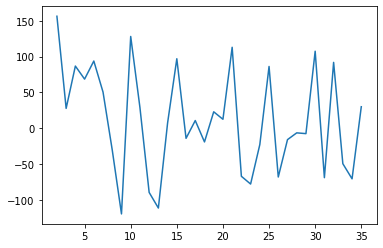

In [128]:
residuals = model_fit.resid
residuals.plot()

In [129]:
residuals.describe()

count     34.000000
mean      11.345171
std       73.291422
min     -119.315434
25%      -44.556113
50%        9.201021
75%       81.868855
max      156.319295
dtype: float64

In [130]:
output = model_fit.forecast()
output

(array([605.60239048]),
 array([64.84952547]),
 array([[478.49965614, 732.70512483]]))

In [131]:
model_fit.forecast(5)

(array([605.60239048, 694.58752726, 690.78777149, 736.11155138,
        768.33971803]),
 array([64.84952547, 64.928472  , 77.88533338, 80.65971295, 84.79264843]),
 array([[478.49965614, 732.70512483],
        [567.33006057, 821.84499395],
        [538.13532315, 843.44021984],
        [578.021419  , 894.20168377],
        [602.14918096, 934.5302551 ]]))

# walk Forward ARIMA

In [138]:
df= df.dropna()
df.tail()

,Month,Sale
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [145]:
train_size = int(df.shape[0]*0.7)
train, test = df.Sale[0:train_size], df.Sale[train_size:]

In [146]:
data = train
predict = []

for t in test:
    model = ARIMA(data, order=(2,1,0) )
    model_fit = model.fit()
    y = model_fit.forecast()
    predict.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)

predict

[337.3494838994595,
 378.28345125052687,
 413.3210633305689,
 370.97816271663066,
 425.7570804659086,
 429.4012950622728,
 474.5807216640613,
 542.7101817522582,
 480.81370375437814,
 634.3273253353825,
 561.0514056323846]

In [147]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

6516.923803938612

# SARIMA Model

In [150]:
sarima_df = pd.read_csv('Electric_Production.csv', parse_dates=[0])
print(sarima_df.shape, sarima_df.dtypes)
sarima_df.head()

(397, 2) DATE          datetime64[ns]
IPG2211A2N           float64
dtype: object


,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


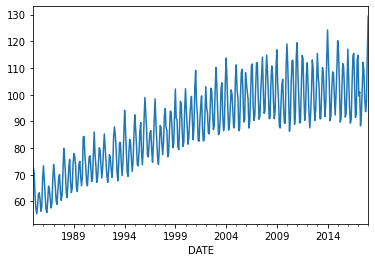

In [155]:
sarima_df.index = sarima_df['DATE']
sarima_df['IPG2211A2N'].plot()

TypeError: 'Figure' object is not subscriptable

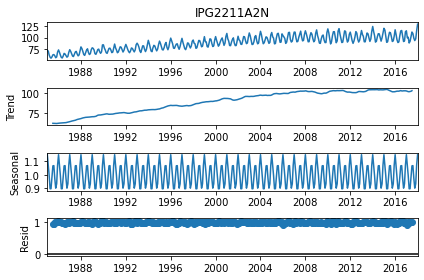

In [158]:
from statsmodels.tsa.seasonal import seasonal_decompose
mul_result = seasonal_decompose(sarima_df['IPG2211A2N'], model='multiplicative')
mul_result.plot()[0]

In [159]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

sarima_model = SARIMAX(sarima_df['IPG2211A2N'], order = (5,1,3), seasonal_order =(1, 1, 1, 12)) 
  
sarima_model_fit = sarima_model.fit() 
print(sarima_model_fit.summary())

residual = sarima_model_fit.resid
residual.plot() # Residuals are nothing but white noise, it means the model has extrated all the info from dataset

/Users/tusharrathod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/tusharrathod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/tusharrathod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tusharrathod/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tusharrathod/anaconda3/lib/python3.7/site-packages/s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           IPG2211A2N   No. Observations:                  397
Model:             SARIMAX(5, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -883.683
Date:                              Wed, 09 Sep 2020   AIC                           1789.365
Time:                                      11:50:43   BIC                           1832.822
Sample:                                  01-01-1985   HQIC                          1806.602
                                       - 01-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5893      0.453     -1.301      0.193      -1.477       0.298
ar.L2          0.3253      0.192      1.696      0.090      -0.051       0.701
ar.L3          0.0919      0.216      0.425      0.671      -0.331       0.515
ar.L4          0.0175      0.076      0.229      0.819      -0.132       0.167
ar.L5         -0.1051      0.071     -1.483      0.138      -0.244       0.034
ma.L1          0.2074      0.453      0.458      0.647      -0.681       1.096
ma.L2         -0.8836      0.050    -17.709      0.000      -0.981      -0.786
ma.L3         -0.1958      0.418     -0.468      0.640      -1.016       0.624
ar.S.L12       0.0284      0.058      0.489      0.625      -0.085       0.142
ma.S.L12      -0.7685      0.049    -15.656      0.000      -0.865      -0.672
sigma2         5.6592      0.367     15.423      0.000       4.940       6.378
===================================================================================
Ljung-Box (Q):                       43.30   Jarque-Bera (JB):                20.46
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

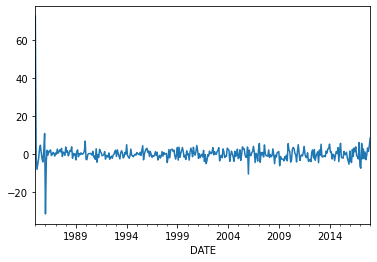

In [160]:
residual = sarima_model_fit.resid
residual.plot() # Residuals are nothing but white noise, it means the model has extrated all the info from dataset

In [161]:
output = sarima_model_fit.forecast()
output

2018-02-01    113.829195
Freq: MS, dtype: float64

In [162]:
sarima_df.tail()

,DATE,IPG2211A2N
DATE,,
2017-09-01,2017-09-01,98.6154
2017-10-01,2017-10-01,93.6137
2017-11-01,2017-11-01,97.3359
2017-12-01,2017-12-01,114.7212
2018-01-01,2018-01-01,129.4048


In [163]:
yhat = sarima_model_fit.predict()
yhat.tail()

2017-09-01     99.238014
2017-10-01     90.501094
2017-11-01     96.094711
2017-12-01    110.654724
2018-01-01    121.095641
Freq: MS, dtype: float64

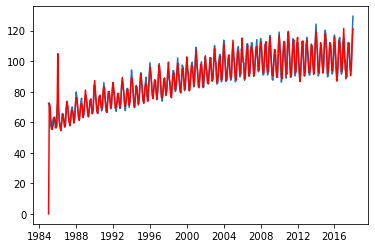

In [164]:
plt.plot(sarima_df['IPG2211A2N'])
plt.plot(yhat, color='red')

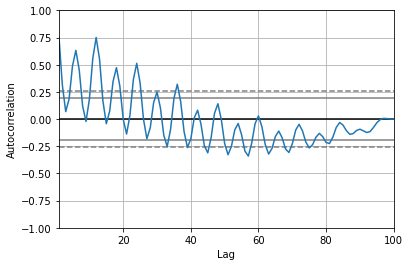

In [179]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sarima_df['IPG2211A2N'].iloc[:100,])

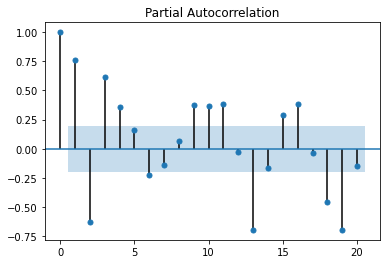

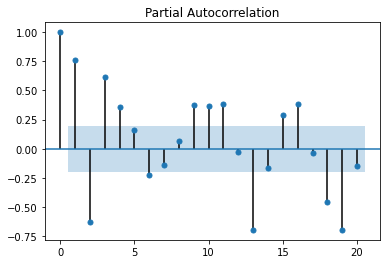

In [180]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(sarima_df['IPG2211A2N'].iloc[:100,])